In [588]:
import re
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from collections import Counter
import statistics
import seaborn as sns

### Splits each line by '/' and stores entry of name and text. Returns list.

In [589]:
def split_name_text(text_data):

    # Initialise a list to store dictionaries
    entries = []

    # Extract the name and text part from each line
    for line in text_data:
        parts = line.split('/')
        name = parts[2]
        text = line.split(':', 1)[1].strip()
        
        # Create a dictionary for each entry
        entry = {'Name': name, 'Text': text}
        
        # Append the dictionary to the list
        entries.append(entry)


    # Return list
    return entries

### Filters 'spe.text' to ensure that each line of the file contains spe(followed by a space or apostrophe) or 'special purpose ent .* and returns the list


In [590]:
def filter_dict(entries):

    # Patterns to search
    pattern = r'spe(?=[\s\'s])'
    pattern2 = r'special purpose ent(?=.*)'


    # Initialize a new list to store filtered entries
    filtered_entries = []

    # Iterate through each entry in the list
    for entry in entries:
        if re.search(pattern, entry['Text'], re.IGNORECASE) or re.search(pattern2, entry['Text'], re.IGNORECASE):
            # If the condition is met, append the entry to the filtered list
            filtered_entries.append(entry)

    # Update the entries list with the filtered entries
    entries = filtered_entries

    return entries

### Generates each list to a csv 'output.csv'


In [591]:
def to_csv(entries):
    # Specify the path for the CSV file
    csv_file = 'output.csv'

    # Write the contents of the list of dictionaries to the CSV file
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['Name', 'Text'])
        
        # Write the header row
        writer.writeheader()
        
        # Write each dictionary as a row in the CSV file
        for entry in entries:
            writer.writerow(entry)

    print("CSV file has been created successfully.")


### Takes 'output.csv' and generates a DataFrame, then removes the duplicates and returns the DataFrame

In [592]:
def to_pd():
    # Read the CSV file into a DataFrame
    df = pd.read_csv('output.csv')

    # Drops the duplicates
    df.drop_duplicates()

    return df


### Creates a list of unique names that occur in the original text file


In [593]:
def drop_dup_names(df):
    # Initialise column of unique names 
    names_df = df['Name'].drop_duplicates()

    # Initialise list of names
    names_list = []

    # Adds each name from the DataFrame to the list
    for name in names_df:
        names_list.append(name)

    return names_list

### Creates a list of names that were involved in emails from 2001

In [594]:
def year_check():
    # Read '2001.text'
    with open('./2001.text', 'r',) as file:
        # Read each line of '2001.text'
        year_data = file.readlines()


    # Initialise list of names
    names2001 = []

    # Takes each line of year_data, splits by '/' and takes just the name. Appends to list.
    for line in year_data:
        parts = line.split('/')
        name = parts[2]
        names2001.append(name)

    return names2001


### Creates a Dataframe for names2001

In [595]:
def to_df_2001(names2001):
    # Create a DataFrame from the list of names, specifying the column name as 'Names'
    df_names_2001 = pd.DataFrame(names2001, columns=['Names'])
    # Drop duplicate entries in the 'Names' column and assign the result back to df_names_2001
    df_names_2001 = df_names_2001['Names'].drop_duplicates()

    # Initialize an empty list to store unique names
    names_2001_list = []

    # Iterate through each unique name in the DataFrame
    for name in df_names_2001:
        # Append the name to the names_2001_list
        names_2001_list.append(name)

    return names_2001_list

### Check Names Function Against 2001 List

In [596]:
def check_names(names_2001_list, names_list):
    
    # Initialize an empty list to store names from names_list that are also in names_2001_list
    names_2001 = []

    # Iterate through each name in names_list
    for name in names_list:
        # Check if the current name exists in names_2001_list
        if name in names_2001_list:
            # If it does, append it to the names_2001 list
            names_2001.append(name)

    
    return names_2001

### Main Code Block

In [597]:
# List of data files to process
data_files = ['./spe.text', 'off_balance.text', './market_to_market.text', './fraud.text', './insider_trading.text']

# Initialize sets and total_name_count variables
sets = []
total_name_count = {}

# Loop through each file in data_files
for file in data_files:

    # Open file for reading
    with open(file, 'r', encoding='utf-8', errors='ignore') as f:
        # Read lines from the file
        text_data = f.readlines()

        # Split the text data into name-text pairs
        name_text = split_name_text(text_data)

        # Filter the name_text if the file is 'SPE.text'
        if file == './SPE.text':
            name_text = filter_dict(name_text)

        # Convert name-text pairs to CSV format
        to_csv(name_text)

        # Extract file name and create dataframe name
        file_name = os.path.basename(file)
        dataframe_name = os.path.splitext(file_name)[0] + '_df'
        
        # Check names against the year 2001
        names2001 = year_check()
        df_2001 = to_df_2001(names2001)

        # Convert name-text pairs to DataFrame
        df = to_pd()

        # Get list of names from DataFrame
        name_count_entry = df['Name'].to_list()

        # Filter names based on names from 2001
        name_count_entry = check_names(df_2001, name_count_entry)

        # Update total_name_count dictionary with name counts
        for name in name_count_entry:
            if name in total_name_count:
                total_name_count[name] += 1
            else:
                total_name_count[name] = 1

        #Checks the employees in 2001, if not already counted, listed as 0 value        
        for name in df_2001:
            if name in total_name_count:
                #do nothing
                continue
            else:
                total_name_count[name] = 0

        
        # Drop duplicate names from DataFrame
        df = drop_dup_names(df)
        
        # Check completed names against 2001 names
        completed_names = check_names(df_2001, df)

        # Create entry for the current DataFrame
        entry = {'DataFrame': [dataframe_name], 'Employees': completed_names}
        
        # Append entry to sets list
        sets.append(entry)
# Print sets and total name count
print(sets)
print(total_name_count)
print(len(total_name_count))

# Keep names private
sequential_number = 1
new_total_name_count = {}
for name in total_name_count:
    new_total_name_count[f'Employee-{sequential_number}'] = total_name_count[name]
    sequential_number += 1

print(new_total_name_count)
total_name_count = new_total_name_count
    

CSV file has been created successfully.
CSV file has been created successfully.
CSV file has been created successfully.
CSV file has been created successfully.
CSV file has been created successfully.
[{'DataFrame': ['spe_df'], 'Employees': ['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e', 'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d', 'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m', 'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'kuykendall-t', 'lavorato-

### Counting Occurrences of Employee Names

In [598]:
# Initialize dictionary to count occurrences of each employee name
name_count = {}

# Iterate through each entry in the sets list
for entry in sets:
    for employee in entry['Employees']:  # Accessing the 'Employees' key of each entry
        if employee in name_count:
            name_count[employee] += 1  # Increment count if name is already in dictionary
        else:
            name_count[employee] = 1  # Initialize count if name is encountered for the first time

print(name_count)
print(len(name_count))

# Keep names private
sequential_number = 1
new_name_count = {}
for name in name_count:
    new_name_count[f'Employee-{sequential_number}'] = name_count[name]
    sequential_number += 1

print(new_name_count)
name_count = new_name_count

{'allen-p': 2, 'arnold-j': 4, 'arora-h': 3, 'badeer-r': 1, 'bailey-s': 1, 'bass-e': 4, 'baughman-d': 4, 'beck-s': 3, 'benson-r': 2, 'blair-l': 5, 'brawner-s': 2, 'buy-r': 5, 'campbell-l': 3, 'carson-m': 3, 'cash-m': 3, 'causholli-m': 2, 'corman-s': 4, 'crandell-s': 2, 'cuilla-m': 2, 'dasovich-j': 4, 'davis-d': 2, 'dean-c': 2, 'delainey-d': 2, 'derrick-j': 3, 'dickson-s': 1, 'donoho-l': 2, 'donohoe-t': 2, 'dorland-c': 3, 'ermis-f': 2, 'farmer-d': 3, 'fischer-m': 2, 'forney-j': 2, 'fossum-d': 3, 'gay-r': 2, 'geaccone-t': 3, 'germany-c': 4, 'gilbertsmith-d': 1, 'giron-d': 3, 'griffith-j': 3, 'grigsby-m': 3, 'guzman-m': 2, 'haedicke-m': 5, 'hain-m': 2, 'harris-s': 2, 'hayslett-r': 3, 'heard-m': 2, 'hendrickson-s': 2, 'hernandez-j': 3, 'hodge-j': 3, 'holst-k': 3, 'horton-s': 3, 'hyatt-k': 4, 'hyvl-d': 2, 'jones-t': 3, 'kaminski-v': 5, 'kean-s': 4, 'keavey-p': 3, 'keiser-k': 3, 'king-j': 3, 'kitchen-l': 4, 'kuykendall-t': 1, 'lavorato-j': 3, 'lay-k': 4, 'lenhart-m': 3, 'lewis-a': 4, 'linder-

In [599]:
# Calculate mean
mean = statistics.mean(name_count.values())

# Calculate mode
mode = statistics.mode(name_count.values())

# Calculate median
median = statistics.median(name_count.values())

print("Mean:", mean)
print("Mode:", mode)
print("Median:", median)

Mean: 2.6912751677852347
Mode: 3
Median: 3


### Plotting Top 100 Employee Names by Occurrences

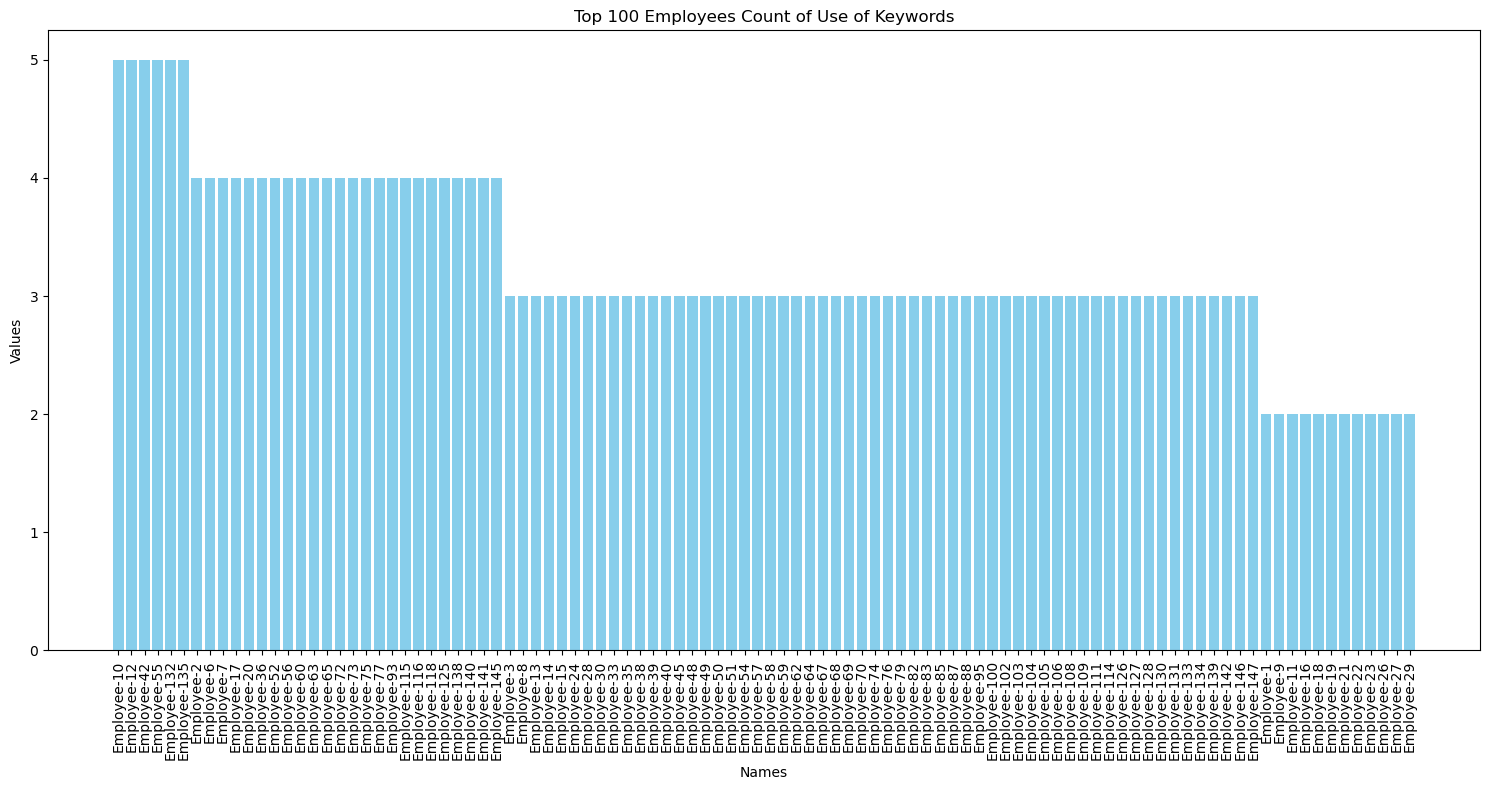

In [600]:
sorted_data = dict(sorted(name_count.items(), key=lambda item: item[1], reverse=True)[:100])

# Extract names and values
names = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the bar plot
plt.figure(figsize=(15, 8)) 
plt.bar(names, values, color='skyblue')

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Top 100 Employees Count of Use of Keywords')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

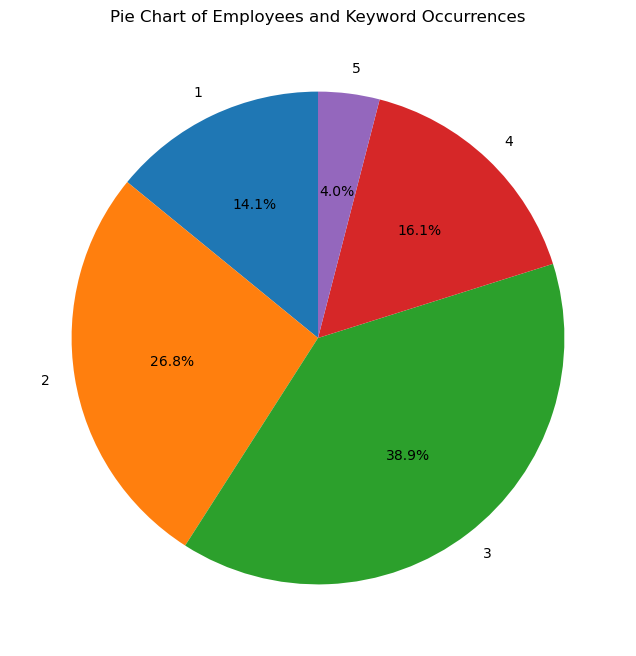

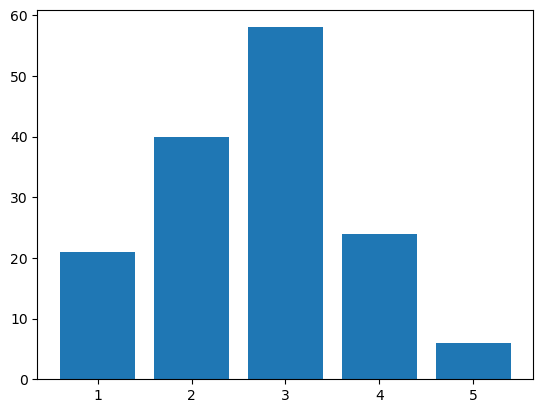

In [601]:
value_counts = Counter(name_count.values())
sizes = [value_counts[key] for key in sorted(value_counts.keys())]
names = [str(key) for key in sorted(value_counts.keys())]
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=names, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Employees and Keyword Occurrences')

plt.show()

plt.bar(names, sizes)
plt.show()

### Plotting Top 50 Employee Names by Total Occurrences

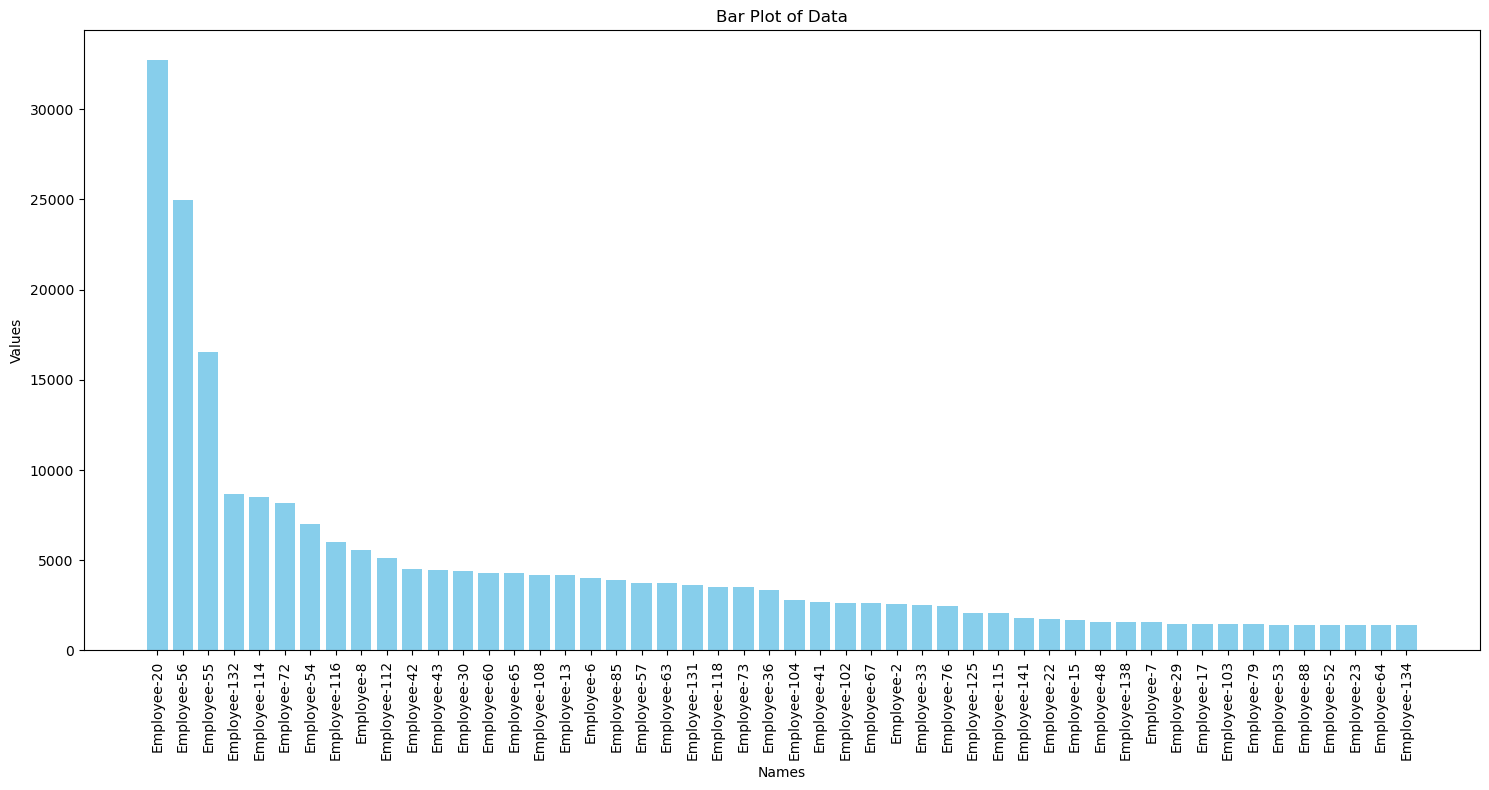

In [602]:
sorted_data = dict(sorted(total_name_count.items(), key=lambda item: item[1], reverse=True)[:50])

# Extract names and values
names = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the bar plot
plt.figure(figsize=(15, 8)) 
plt.bar(names, values, color='skyblue')

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Plot of Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Extracting Employee Names Occurring 3 or More Times

In [603]:
names_more_3 = []

# Iterate over the dictionary name_count
for name, value in name_count.items():
    # Check if the value (number of occurrences) is greater than or equal to 3
    if value >= 3:
        names_more_3.append(name)

print(names_more_3)

['Employee-2', 'Employee-3', 'Employee-6', 'Employee-7', 'Employee-8', 'Employee-10', 'Employee-12', 'Employee-13', 'Employee-14', 'Employee-15', 'Employee-17', 'Employee-20', 'Employee-24', 'Employee-28', 'Employee-30', 'Employee-33', 'Employee-35', 'Employee-36', 'Employee-38', 'Employee-39', 'Employee-40', 'Employee-42', 'Employee-45', 'Employee-48', 'Employee-49', 'Employee-50', 'Employee-51', 'Employee-52', 'Employee-54', 'Employee-55', 'Employee-56', 'Employee-57', 'Employee-58', 'Employee-59', 'Employee-60', 'Employee-62', 'Employee-63', 'Employee-64', 'Employee-65', 'Employee-67', 'Employee-68', 'Employee-69', 'Employee-70', 'Employee-72', 'Employee-73', 'Employee-74', 'Employee-75', 'Employee-76', 'Employee-77', 'Employee-79', 'Employee-82', 'Employee-83', 'Employee-85', 'Employee-87', 'Employee-88', 'Employee-93', 'Employee-95', 'Employee-100', 'Employee-102', 'Employee-103', 'Employee-104', 'Employee-105', 'Employee-106', 'Employee-108', 'Employee-109', 'Employee-111', 'Empl

### Plotting Top 50 Employee Names by Total Occurrences with Highlighted Names Occurring 3 or More Times

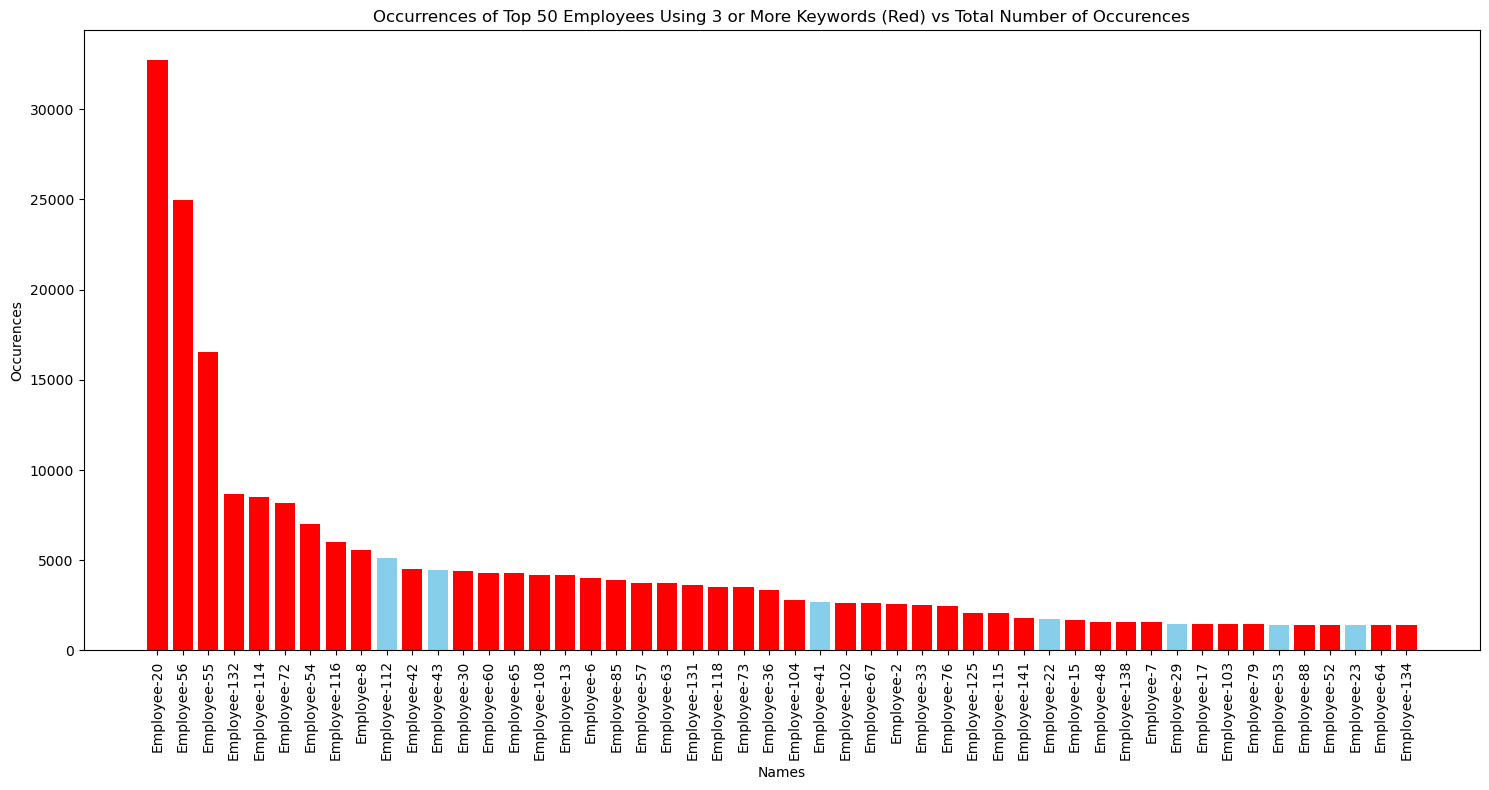

In [604]:
sorted_data = dict(sorted(total_name_count.items(), key=lambda item: item[1], reverse=True)[:50])

names = list(sorted_data.keys())
values = list(sorted_data.values())

# Define colors for the bars
colors = ['red' if name in names_more_3 else 'skyblue' for name in names]

# Plotting the bar plot with colored bars
plt.figure(figsize=(15, 8)) 
bars = plt.bar(names, values, color=colors)

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Occurences')
plt.title('Occurrences of Top 50 Employees Using 3 or More Keywords (Red) vs Total Number of Occurences')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Analysing Total Employee Occurences

In [605]:
# Print the sorted_data dictionary containing the employee names by total occurrences
print(sorted_data)

count = 0

# Iterate over the sorted_data dictionary
for name, value in sorted_data.items():
    # Check if the name occurs 3 or more times
    if name in names_more_3:
        count += 1
# Calculate the percentage of names with 3 or more occurrences
count = round(count/50 * 100)

print(f'Percentage of top 50 names with 3 or more of keywords: {count}%')

# Calculate the total count of unique names in the total_name_count dictionary
number_of_names = len(total_name_count)

# Print the total count of unique names
print(f'Total count of unique names: {number_of_names}')

{'Employee-20': 32739, 'Employee-56': 24962, 'Employee-55': 16569, 'Employee-132': 8650, 'Employee-114': 8505, 'Employee-72': 8170, 'Employee-54': 7025, 'Employee-116': 6021, 'Employee-8': 5567, 'Employee-112': 5142, 'Employee-42': 4524, 'Employee-43': 4482, 'Employee-30': 4409, 'Employee-60': 4321, 'Employee-65': 4306, 'Employee-108': 4200, 'Employee-13': 4193, 'Employee-6': 4029, 'Employee-85': 3889, 'Employee-57': 3759, 'Employee-63': 3734, 'Employee-131': 3651, 'Employee-118': 3538, 'Employee-73': 3514, 'Employee-36': 3339, 'Employee-104': 2797, 'Employee-41': 2695, 'Employee-102': 2649, 'Employee-67': 2631, 'Employee-2': 2603, 'Employee-33': 2529, 'Employee-76': 2451, 'Employee-125': 2098, 'Employee-115': 2059, 'Employee-141': 1785, 'Employee-22': 1758, 'Employee-15': 1715, 'Employee-48': 1604, 'Employee-138': 1601, 'Employee-7': 1578, 'Employee-29': 1479, 'Employee-17': 1476, 'Employee-103': 1458, 'Employee-79': 1442, 'Employee-53': 1433, 'Employee-88': 1433, 'Employee-52': 1405,

### Occurence statistics for all employees

In [606]:
# Calculate mean
mean = statistics.mean(total_name_count.values())

# Calculate mode
mode = statistics.mode(total_name_count.values())

# Calculate median
median = statistics.median(total_name_count.values())

print("Mean:", mean)
print("Mode:", mode)
print("Median:", median)

Mean: 1929.751677852349
Mode: 1386
Median: 791


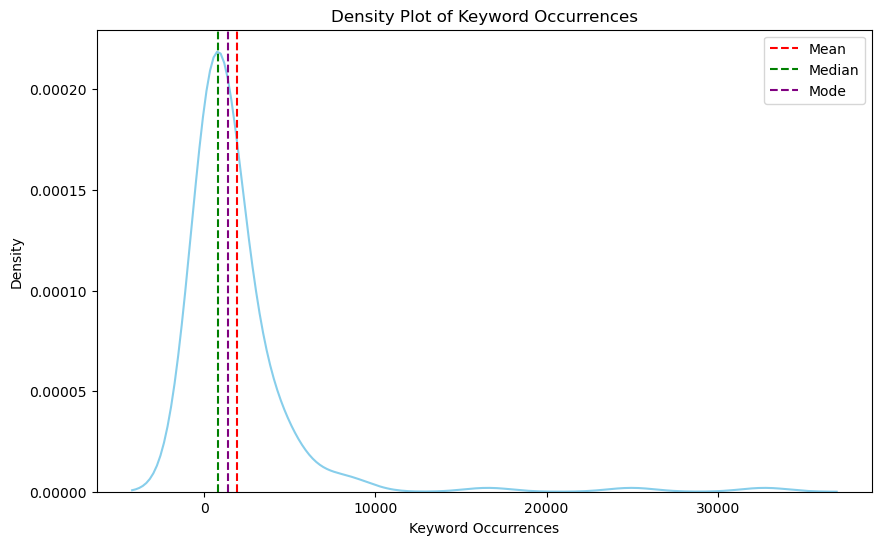

In [607]:
keyword_occurrences = total_name_count 

# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(keyword_occurrences, color='skyblue')

# Add mean, median, and mode lines
plt.axvline(x=1929.75, color='red', linestyle='--', label='Mean')
plt.axvline(x=791, color='green', linestyle='--', label='Median')
plt.axvline(x=1386, color='purple', linestyle='--', label='Mode')

# Add labels and title
plt.xlabel('Keyword Occurrences')
plt.ylabel('Density')
plt.title('Density Plot of Keyword Occurrences')
plt.legend()

# Show plot
plt.show()
